## Pick last timestep of every run of multirun
* This is me doing the same thing I already did in `CompareMultipleRuns.ipynb` but in different approach because I like wasting time

In [51]:
%matplotlib widget

In [33]:
import xarray as xr
import hvplot.xarray
import pyvista as pv
from JulesD3D.processNetCDF import fixCORs, fixMeshGrid, addVectorSum, makeVelocity
from JulesD3D.utils import quickDF, folderPicker
from os import path, walk
import ipywidgets as widgets
from IPython.display import Markdown as md

In [2]:
parent_folder = '/Users/julesblom/ThesisResults/'
scenario_folder = folderPicker(parent_folder)
scenario_folder

Select(description='Scenario folder:', layout=Layout(height='120px', width='100%'), options=('/Users/julesblom…

## ⚠️ Things blow up when you include Run01 in this folder  ¯\_(ツ)_/¯   ⚠️

In [42]:
all_nc_files_in_folder = scenario_folder.value + '*.nc'
scenario = scenario_folder.value[-10:-1]
scenario

'Slope1.00'

In [43]:
# hack because first dataset is composed slightly differntly compared to restart datasets 
first_ncfilename = '/Users/julesblom/ThesisResults/Slope085_Run01.nc' # '/Users/julesblom/ThesisResults/Slope125_Run01.nc'

first = xr.open_dataset(first_ncfilename)

In [50]:
# chunking makes adding vector sums much faster!
combined = xr.open_mfdataset(all_nc_files_in_folder, combine='nested', concat_dim="time", chunks={'time': 10},
                             data_vars='minimal', coords='minimal', join='left', compat='override')

In [51]:
bottom_stress_attrs = {'long_name': 'Bottom stress', 'units': 'N/m2', 'grid': 'grid', 'location': 'edge1'}
bottom_stres_dims = ('time', 'M', 'N')

combined = fixCORs(combined)
combined = fixMeshGrid(combined, mystery_flag=True)
combined = addVectorSum(combined, 'TAUKSI', 'TAUETA', key="bottom_stress", attrs=bottom_stress_attrs, dims=bottom_stres_dims)
combined['bottom_diff'] = first.DPS.isel(time = 0) - combined.DPS # Make accumulated deposition/erosion DataArray—
combined = makeVelocity(combined, transpose=False)

● Fixing mesh grid, assuming a uniform grid 
132 x 182 grid


In [60]:
plot_settings = dict(
    height= 600,
    width= 444,
    rasterize= True,
    dynamic= True,
    attr_labels= True,    
)

In [65]:
_, _, files = next(walk(results_folder[:-4]))
nr_of_datasets = len(files) - 1 # .DS_Store wrecking things here
nr_time_steps = int(combined.time.size)
steps_per_dataset = int(nr_time_steps/nr_of_datasets)
times = [i for i in range(steps_per_dataset-1, nr_time_steps+1, steps_per_dataset)]

In [66]:
md(f"""
# Times
| Name | Value |
| --- | --- |
| Nr of timesteps total | {nr_time_steps} |
| Nr of datasets | {nr_of_datasets} |
| Timestep per set | {steps_per_dataset} |
""")


# Times
| Name | Value |
| --- | --- |
| Nr of timesteps total | 144 |
| Nr of datasets | 12 |
| Timestep per set | 12 |


# Depocenter coords
Ignoring channel

In [71]:
# thickest_points = []
# lowest_point = []

# for time in range(1, only_last_timestep_per_run.time.size):
#     print('time', time)
#     bottom_diff_at_time = only_last_timestep_per_run.bottom_diff.isel(time=time).squeeze()
    
#     thickest_deposit_height = bottom_diff_at_time.max().values    
#     lowest_deposit_height = bottom_diff_at_time.min().values

#     print("thickest:", thickest_deposit_height, "lowest", lowest_deposit_height)
    
#     x_coord_erosion = bottom_diff_at_time.where(bottom_diff_at_time == lowest_deposit_height, drop=True).squeeze().XZ.values
#     y_coord_erosion = bottom_diff_at_time.where(bottom_diff_at_time == lowest_deposit_height, drop=True).squeeze().YZ.values
    
#     x_coord_depocenter = bottom_diff_at_time.where(bottom_diff_at_time == thickest_deposit_height, drop=True).squeeze().XZ.values
#     y_coord_depocenter = bottom_diff_at_time.where(bottom_diff_at_time == thickest_deposit_height, drop=True).squeeze().YZ.values
    
#     thickest_points.append(
#         {"x": x_coord_depocenter,
#          "y": y_coord_depocenter,
#          "height": float(thickest_deposit_height),
#          "run": int(time-1*5)
#         })
# #     lowest_point_coords.append([int(x_coord_erosion),int(y_coord_depocenter) ])

time 1
thickest: 0.1473999 lowest -0.7699585
time 2
thickest: 0.1687622 lowest -0.7974243
time 3
thickest: 0.3076172 lowest -1.4804688
time 4
thickest: 0.4595337 lowest -2.1726685
time 5
thickest: 0.60375977 lowest -2.8484497
time 6
thickest: 0.743103 lowest -3.5142517
time 7
thickest: 0.88323975 lowest -4.1671753
time 8
thickest: 1.0234375 lowest -4.8122253
time 9
thickest: 1.1583862 lowest -5.4520874
time 10
thickest: 1.2886353 lowest -6.087158
time 11
thickest: 1.4125366 lowest -6.724365


In [28]:
thickest_points

[{'x': array([11500, 14500]),
  'y': array([18600, 18600]),
  'height': 0.0380859375,
  'run': -4},
 {'x': array(11500), 'y': array(18600), 'height': 0.1112060546875, 'run': -3},
 {'x': array(11500), 'y': array(18600), 'height': 0.27044677734375, 'run': -2},
 {'x': array(11500), 'y': array(18600), 'height': 0.42083740234375, 'run': -1},
 {'x': array(11500), 'y': array(18600), 'height': 0.561767578125, 'run': 0},
 {'x': array(11700), 'y': array(18800), 'height': 0.6973876953125, 'run': 1},
 {'x': array(12300), 'y': array(19600), 'height': 0.83270263671875, 'run': 2},
 {'x': array(12300), 'y': array(19600), 'height': 0.9676513671875, 'run': 3},
 {'x': array(12300), 'y': array(19600), 'height': 1.10107421875, 'run': 4},
 {'x': array(12300), 'y': array(19600), 'height': 1.232421875, 'run': 5},
 {'x': array(12300), 'y': array(19600), 'height': 1.35595703125, 'run': 6}]

In [18]:
lowest_point_coords

NameError: name 'lowest_point_coords' is not defined

# Bottom stress mean

In [46]:
bottom_stress = combined.bottom_stress
filtered_bottom_stress = bottom_stress.where(bottom_stress > 0.01)

In [59]:
filtered_bottom_stress.hvplot.quadmesh('XZ', 'YZ',
                        cmap='inferno_r',
                        clim=(0,10),
                        clabel=filtered_bottom_stress.attrs['units'],                                                                       
                        **plot_settings
                       ) 

<xarray.DataArray 'bottom_stress' (time: 132, M: 132, N: 182)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       ...,

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.01169542,
         0.03835655,        nan],
        [       nan,        nan,        nan, ..., 0.01138521,
         0.03762091,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.01150244,
         0.03785038,        nan],
        [       nan,        nan,        nan, ..., 0.01178673,
         0.0384885 ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.01248312,
         0.03837834,        nan],
        [       nan,        nan,        nan, ..., 0.01230082,
         0.03803371,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.01259685,
         0.03863658,        nan],
        [       nan,        nan,        nan, ..., 0.01274245,
         0.03887255,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ..., 0.01310065,
         0.03930614,        nan],
        [       nan,        nan,        nan, ..., 0.01295966,
         0.03927147,        nan],
        ...,
        [       nan,        nan,        nan, ..., 0.01346514,
         0.0406571 ,        nan],
        [       nan,        nan,        nan, ..., 0.0136521 ,
         0.040706  ,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
    YZ       (M, N) int64 0 200 400 600 800 ... 35400 35600 35800 36000 36200
    XZ       (M, N) int64 0 0 0 0 0 0 0 ... 26100 26100 26100 26100 26100 26100
  * time     (time) datetime64[ns] 2020-02-01T20:30:00 ... 2020-03-14T16:18:00
Dimensions without coordinates: M, N
Attributes:
    long_name:  Bottom stress
    units:      N/m2
    grid:    

In [58]:
filtered_bottom_stress.groupby('time').max(...)
# .hvplot.line('time', 'bottom_stress', logy=True)

<xarray.DataArray 'bottom_stress' (time: 132)>
array([ 0.08648916, 13.161996  ,  8.709326  ,  3.2032979 ,  1.5842146 ,
        0.96305746,  0.6436989 ,  0.39487767,  0.19257389,  0.14503372,
        0.11922865,  0.09824052,  0.1075243 ,  8.221683  ,  3.5794296 ,
        1.8874013 ,  1.0240438 ,  0.6652296 ,  0.45921066,  0.32664487,
        0.24232899,  0.178976  ,  0.13486649,  0.10895479,  0.10916123,
        8.814602  ,  3.6090643 ,  1.8546414 ,  1.0248857 ,  0.67667335,
        0.45530194,  0.3232256 ,  0.23991074,  0.17964998,  0.13859777,
        0.11087312,  0.11013021,  8.532574  ,  3.6389027 ,  1.8034327 ,
        1.0217199 ,  0.6754252 ,  0.4514336 ,  0.3245367 ,  0.2378536 ,
        0.1815507 ,  0.13875769,  0.11097679,  0.11078839,  8.143799  ,
        3.6291022 ,  1.7766743 ,  1.0130941 ,  0.6602993 ,  0.45302057,
        0.3234634 ,  0.24054   ,  0.18328795,  0.13980241,  0.11137775,
        0.11126947,  7.865812  ,  3.6058774 ,  1.7758406 ,  1.015585  ,
        0.659636  ,  0.4566773 ,  0.32339305,  0.24055916,  0.18464287,
        0.14003707,  0.11213734,  0.11197174,  7.8082833 ,  3.591579  ,
        1.7946587 ,  1.0185695 ,  0.663954  ,  0.46249285,  0.32427728,
        0.24286868,  0.18488778,  0.14151032,  0.1134415 ,  0.11236601,
        8.397132  ,  3.5831196 ,  1.8293364 ,  1.0195804 ,  0.67128104,
        0.4654546 ,  0.32760546,  0.24613619,  0.18655221,  0.14135464,
        0.11412119,  0.1141933 ,  7.6217613 ,  3.6266935 ,  1.8228505 ,
        1.0266776 ,  0.6738013 ,  0.4560597 ,  0.32370314,  0.24490221,
        0.18775144,  0.13965698,  0.11479532,  0.11454252,  7.4661374 ,
        3.5299885 ,  1.8597293 ,  1.0345213 ,  0.6702934 ,  0.45765987,
        0.33199093,  0.24621351,  0.1883935 ,  0.14112642,  0.11628237,
        0.11578964,  7.545614  ,  3.5124385 ,  1.8503673 ,  1.0491469 ,
        0.6784496 ,  0.46745878,  0.32727784,  0.25237378,  0.1870914 ,
        0.14100406,  0.11763091], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01T20:30:00 ... 2020-03-14T16:18:00

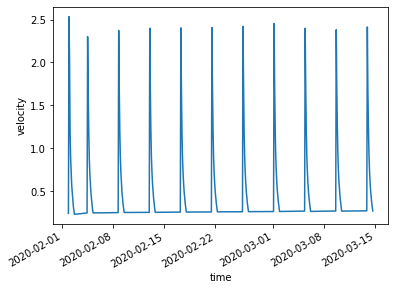

In [61]:
combined.velocity.groupby('time').max(...).plot()

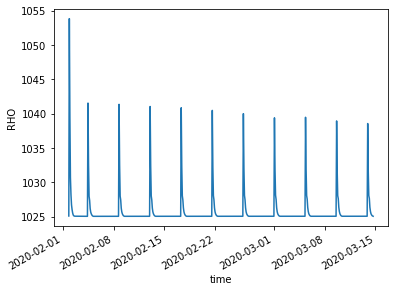

In [62]:
combined.RHO.groupby('time').max(...).plot()

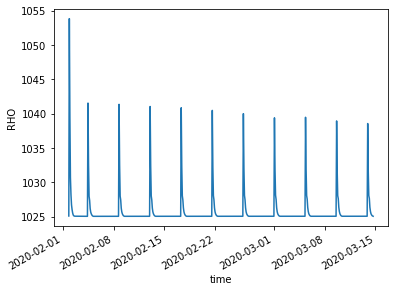

In [64]:
combined.RHO.groupby('time').max(...).plot()

In [87]:
def thickestPoint(x):
    thickest_deposit_height = x.max() 

#     x_coord_depocenter = x.where(x == thickest_deposit_height, drop=True).squeeze().XZ.values
#     y_coord_depocenter = x.where(x == thickest_deposit_height, drop=True).squeeze().YZ.values
    
    return thickest_deposit_height

In [65]:
def lowestPoint(x):
    lowest_deposit_height = bottom_diff_at_time.min().values
    
    x_coord_erosion = bottom_diff_at_time.where(bottom_diff_at_time == lowest_deposit_height, drop=True).squeeze().XZ.values
    y_coord_erosion = bottom_diff_at_time.where(bottom_diff_at_time == lowest_deposit_height, drop=True).squeeze().YZ.values
    

In [75]:
def reductor(x):


In [88]:
combined.bottom_diff.reduce(thickestPoint)


----


<xarray.DataArray 'bottom_diff' ()>
dask.array<amax-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>